# Deep Learning Practice: XOR
## Jupyter Lab Version
## Full solution: no fair peeking

Author: Andrew H. Fagg (andrewhfagg@gmail.com)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import os
import time

# This is the keras 3 way of doing things
from keras.layers import Input, Dense
from keras.models import Sequential

# Default plotting parameters
FONTSIZE = 18
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = FONTSIZE

In [2]:
# Shell command to check GPU usage: nvidia-smi
# Execute if you do not want the GPU to be used:
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


In [4]:
def build_model(n_inputs:int, 
                n_hidden:[int], 
                n_output:int, 
                activation_hidden:str='elu', 
                activation_output:str='elu',
                lrate:float=0.001)->Sequential:
    '''
    Build a simple fully connected model
    
    :param n_inputs: Number of input dimensions
    :param n_hidden: List: number of units in each hidden layer
    :param n_output: Number of ouptut dimensions
    :param activation_hidden: Activation function to be used for hidden and output units
    :param activation_output: Activation function for the output unit(s)
    :param lrate: Learning rate for Adam Optimizer
    '''
    # Simple sequential model
    model = Sequential();
    
    # Input layer
    model.add(Input(shape=(n_inputs,), name = 'Input'))

    # Hidden layer
    for i,n in enumerate(n_hidden):
        model.add(Dense(n, 
                        use_bias=True,
                        activation=activation_hidden,
                        name=f'hidden_{i}',
                       ))
        
    
    # Output layer
    model.add(Dense(n_output,
                    use_bias=True,
                    activation=activation_output,
                    name='output',
                   ))
        
    # My favorite optimizer
    opt = keras.optimizers.Adam(learning_rate=lrate,
                                amsgrad=False)
                                

    # Compile the model.  Mean squared error loss
    model.compile(loss='mse', optimizer=opt)

    # Display the network
    print(model.summary())
    
    #
    return model

In [5]:
# Create training set: XOR
ins = np.array([[0, 0], [0, 1], [1, 0], [1,1]])
outs = np.array([[0], [1], [1], [0]])

In [8]:
# Build our XOR network.  
# Note: sigmoid is a must for binary functions
model = build_model(ins.shape[1], [10], outs.shape[1],
                    activation_output='sigmoid', 
                    lrate=0.01)

2025-08-03 16:14:30.217599: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_0 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [9]:
# Training
history = model.fit(x=ins,
                    y=outs,
                    epochs=1000,
                    verbose=True,
                   )

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - loss: 0.2517
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2494
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2480
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2472
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2465
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2457
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2448
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2438
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2428
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2419
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2410
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2402
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2394
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2385
Epoch 15/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2376
Epo

In [14]:
# What does the trained model do with the inputs?
model.predict(ins)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[0.007444  ],
       [0.9923087 ],
       [0.9940775 ],
       [0.00612354]], dtype=float32)

In [15]:
# What is the performance of the trained model?
#  This shows loss
model.evaluate(ins, outs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.6786e-05


4.6785826270934194e-05

Text(0, 0.5, 'MSE')

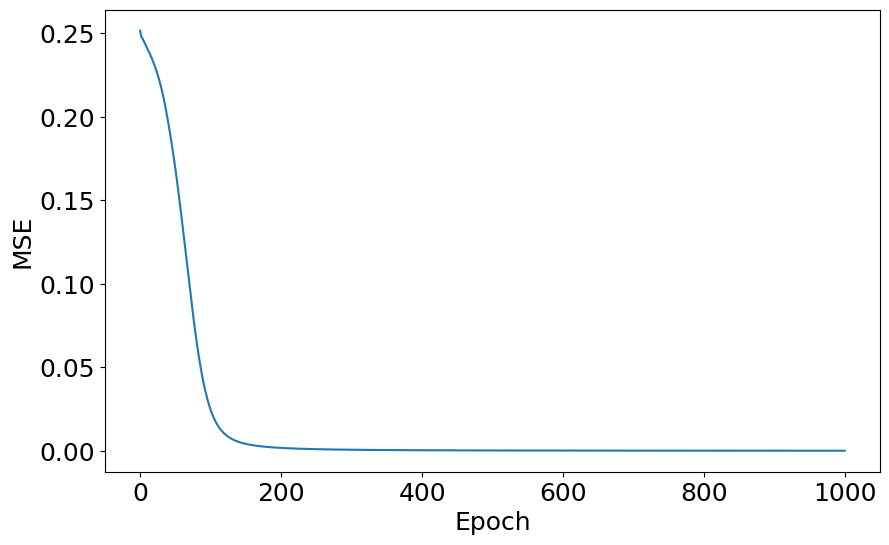

In [12]:
# Display learning curve
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')